In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import spinesTS
spinesTS.__version__

'0.4.2'

In [3]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------------------------------+
|    | ds name              | columns                                                              |
+----+----------------------+----------------------------------------------------------------------+
|  0 | AirPassengers        | Month, #Passengers                                                   |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  5 | Electric_Production  | date, value                                                          |
|  6 | M3_monthly_FTS       | series_id, method_id, forecast, horizon, timestamp, origin_ti

In [6]:
cs = series_data['ETTh1']

x_train, x_test, y_train, y_test = split_series(cs['OT'], cs['OT'], 128, 30, train_size=0.9)

In [7]:
x_train.shape, x_test.shape

((15536, 128), (1727, 128))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

# TCN

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.2210 - mae: 0.2210 - val_loss: 0.1008 - val_mae: 0.1008 - 0.45s/epoch - 0.114s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.1282 - mae: 0.1282 - val_loss: 0.0661 - val_mae: 0.0661 - 0.20s/epoch - 0.049s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0955 - mae: 0.0955 - val_loss: 0.0606 - val_mae: 0.0606 - 0.11s/epoch - 0.029s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.0910 - mae: 0.0910 - val_loss: 0.0557 - val_mae: 0.0557 - 0.18s/epoch - 0.046s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.0870 - mae: 0.0870 - val_loss: 0.0535 - val_mae: 0.0535 - 0.12s/epoch - 0.031s/step
Epoch 6/3000  
4/4 - p1 -  [*lr: 9.55e-05] - loss: 0.0856 - mae: 0.0856 - val_loss: 0.0535 - val_mae: 0.0535 - 0.18s/epoch - 0.045s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0844 - mae: 0.0844 - val_loss: 0.0504 - val_mae: 0.0504 - 0.12s/epoch - 0.029s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

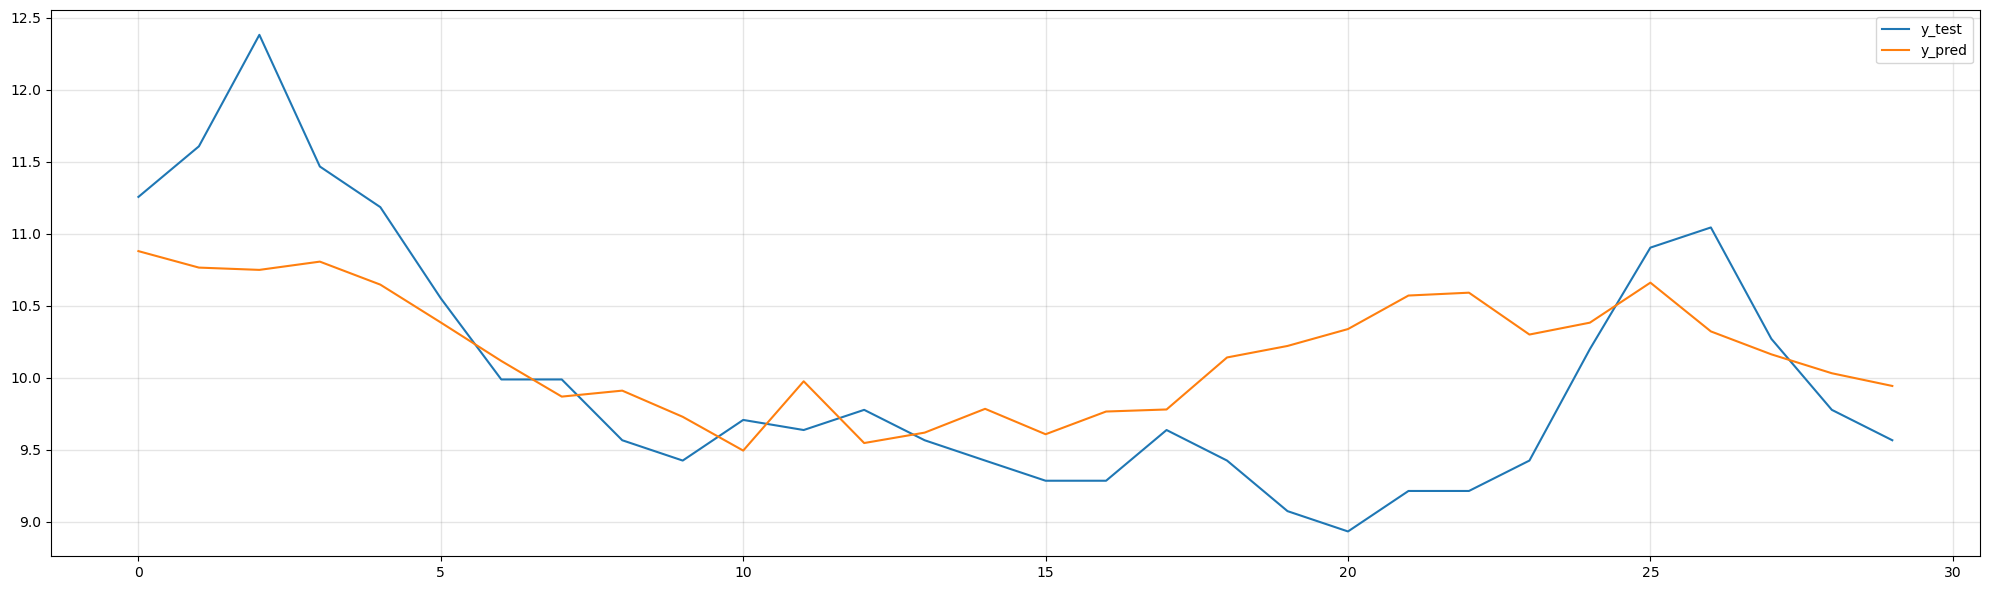

In [10]:
from spinesTS.nn._tcn import TCN

model = TCN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto', min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# SegRNN

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.2775 - mae: 0.2775 - val_loss: 0.1639 - val_mae: 0.1639 - 1.24s/epoch - 0.311s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.1896 - mae: 0.1896 - val_loss: 0.0827 - val_mae: 0.0827 - 0.63s/epoch - 0.157s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1462 - mae: 0.1462 - val_loss: 0.0545 - val_mae: 0.0545 - 0.67s/epoch - 0.168s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.1328 - mae: 0.1328 - val_loss: 0.0504 - val_mae: 0.0504 - 0.63s/epoch - 0.157s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.1291 - mae: 0.1291 - val_loss: 0.0499 - val_mae: 0.0499 - 0.68s/epoch - 0.170s/step
Epoch 6/3000  
4/4 - p1 -  [*lr: 9.55e-05] - loss: 0.1284 - mae: 0.1284 - val_loss: 0.0499 - val_mae: 0.0499 - 0.66s/epoch - 0.165s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1285 - mae: 0.1285 - val_loss: 0.0492 - val_mae: 0.0492 - 0.62s/epoch - 0.155s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

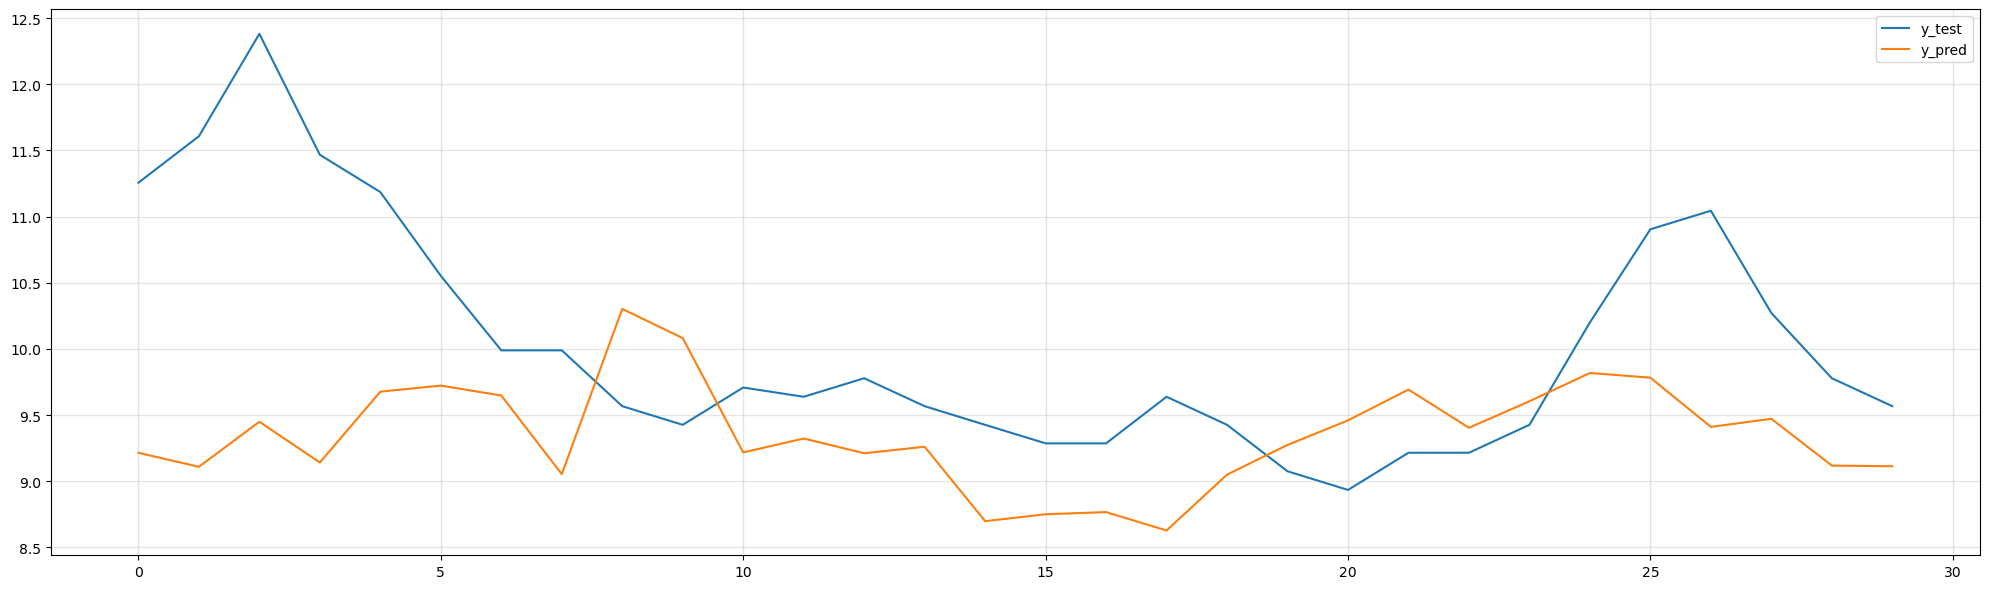

In [9]:
from spinesTS.nn._seg_rnn import SegRNN

model = SegRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto', min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.2775 - mae: 0.2775 - val_loss: 0.1639 - val_mae: 0.1639 - 1.14s/epoch - 0.285s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.1896 - mae: 0.1896 - val_loss: 0.0828 - val_mae: 0.0828 - 0.62s/epoch - 0.154s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1462 - mae: 0.1462 - val_loss: 0.0545 - val_mae: 0.0545 - 0.68s/epoch - 0.170s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.1328 - mae: 0.1328 - val_loss: 0.0504 - val_mae: 0.0504 - 0.61s/epoch - 0.153s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.1291 - mae: 0.1291 - val_loss: 0.0499 - val_mae: 0.0499 - 0.67s/epoch - 0.167s/step
Epoch 6/3000  
4/4 - p1 -  [*lr: 9.55e-05] - loss: 0.1284 - mae: 0.1284 - val_loss: 0.0499 - val_mae: 0.0499 - 0.58s/epoch - 0.146s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1285 - mae: 0.1285 - val_loss: 0.0492 - val_mae: 0.0492 - 0.67s/epoch - 0.168s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

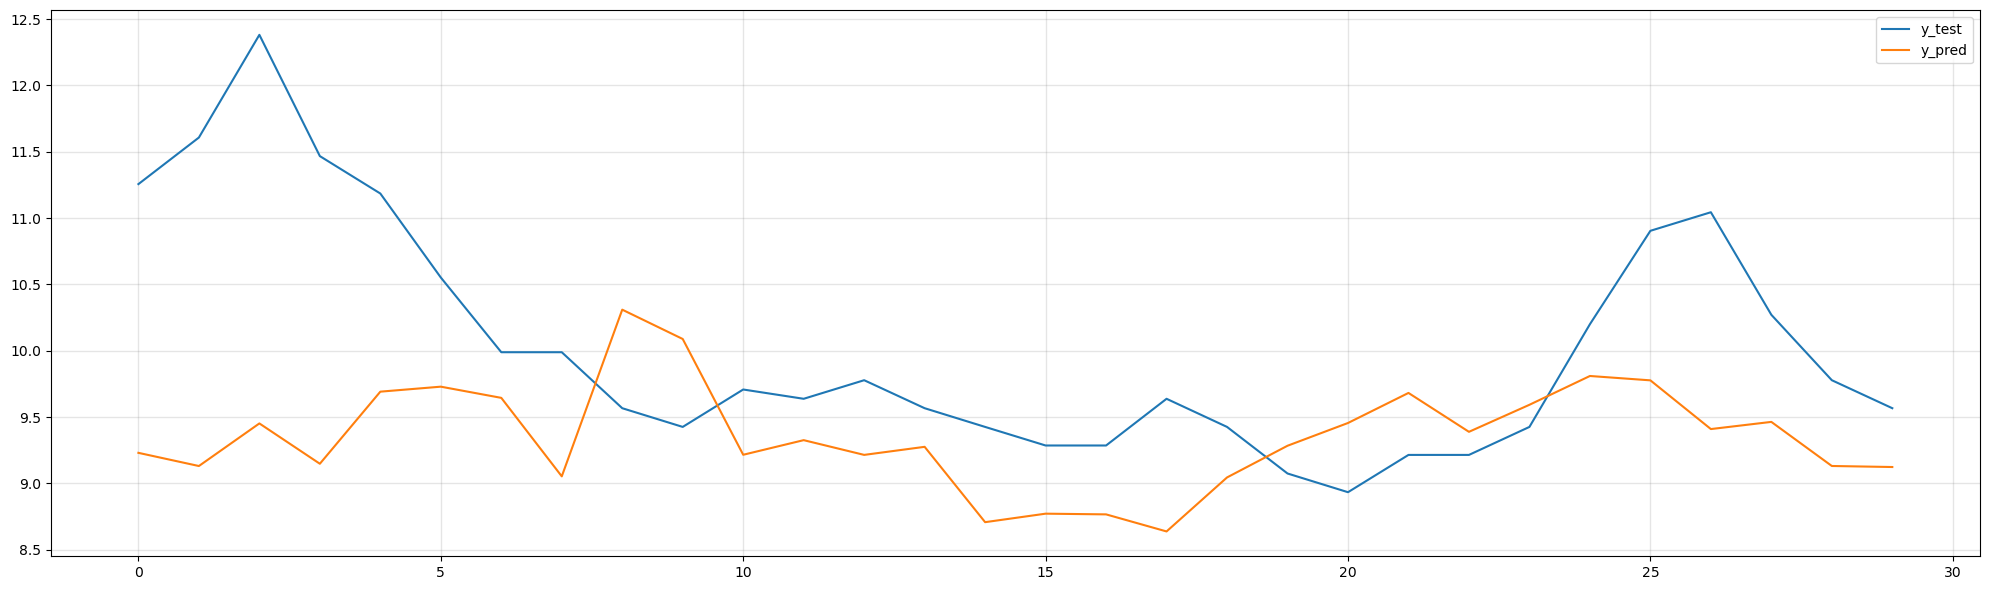

In [11]:
from spinesTS.nn._seg_rnn import SegRNN

model = SegRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto', min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# StackingRNN

MPS  available: True  | MPS  use: False
CUDA available: False | CUDA use: False
CPU  available: True  | CPU  use: True


Epoch 1/3000  
486/486 - p0 -  [*lr: 0.0009045] - loss: 0.0657 - mae: 0.0657 - val_loss: 0.0470 - val_mae: 0.0470 - 4.38s/epoch - 0.009s/step
Epoch 2/3000  
486/486 - p0 -  [*lr: 0.0006545] - loss: 0.0771 - mae: 0.0771 - val_loss: 0.0428 - val_mae: 0.0428 - 4.49s/epoch - 0.009s/step
Epoch 3/3000  
486/486 - p1 -  [*lr: 0.0003455] - loss: 0.0792 - mae: 0.0792 - val_loss: 0.0430 - val_mae: 0.0430 - 4.48s/epoch - 0.009s/step
Epoch 4/3000  
486/486 - p2 -  [*lr: 9.55e-05] - loss: 0.0829 - mae: 0.0829 - val_loss: 0.0489 - val_mae: 0.0489 - 4.35s/epoch - 0.009s/step
Epoch 5/3000  
486/486 - p3 - [*lr: 0.000000e+00] - loss: 0.1111 - mae: 0.1111 - val_loss: 0.0531 - val_mae: 0.0531 - 4.97s/epoch - 0.010s/step
Epoch 6/3000  
486/486 - p4 -  [*lr: 9.55e-05] - loss: 0.1583 - mae: 0.1583 - val_loss: 0.0531 - val_mae: 0.0531 - 4.71s/epoch - 0.010s/step
Epoch 7/3000  
486/486 - p5 -  [*lr: 0.0003455] - loss: 0.1034 - mae: 0.1034 - val_loss: 0.0513 - val_mae: 0.0513 - 4.91s/epoch - 0.010s/step
Epoch 

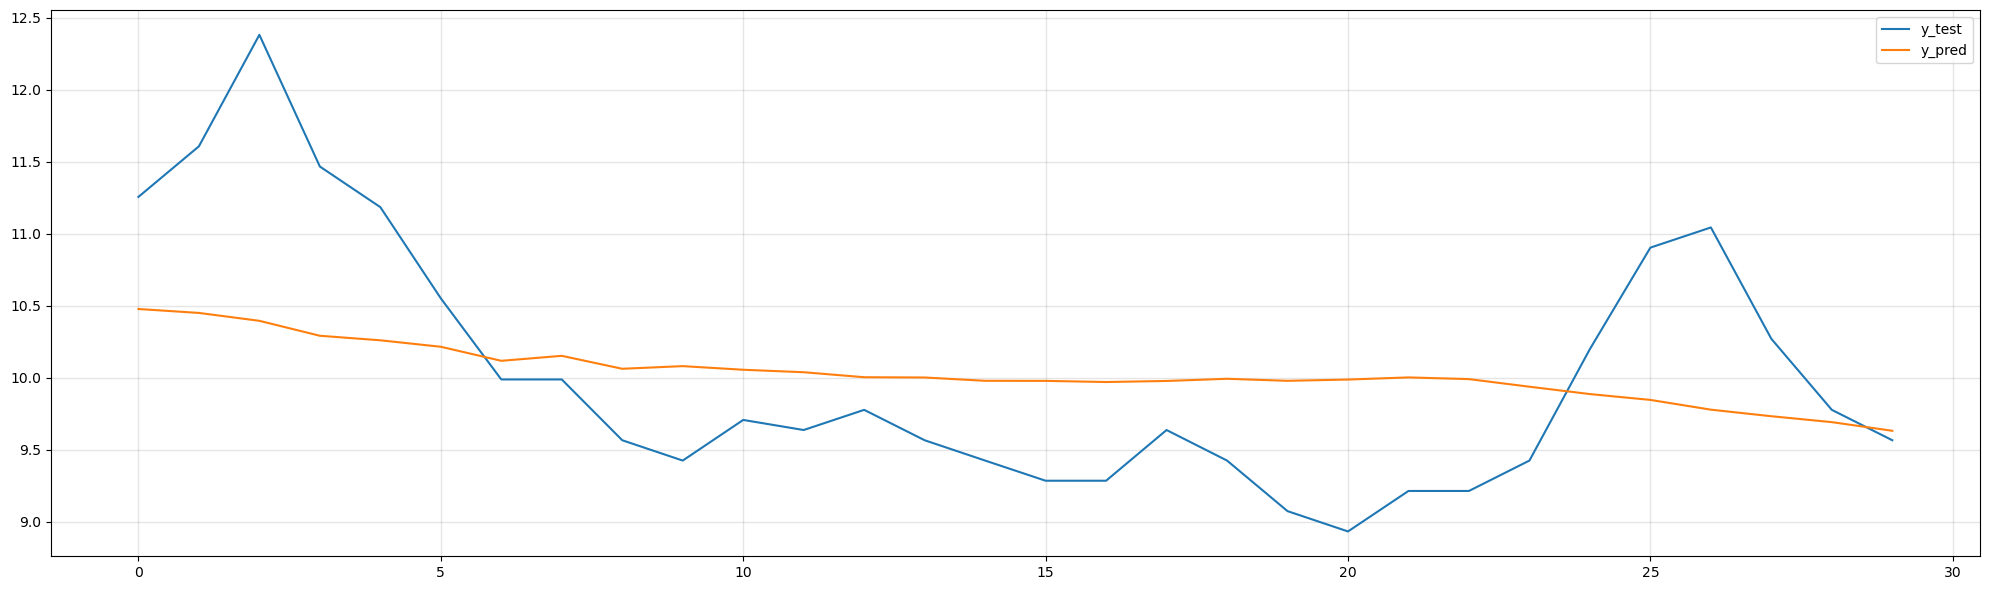

In [20]:
model = StackingRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

MPS  available: True  | MPS  use: False
CUDA available: False | CUDA use: False
CPU  available: True  | CPU  use: True


Epoch 1/3000  
486/486 - p0 -  [*lr: 0.0009045] - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0419 - val_mae: 0.0419 - 2.16s/epoch - 0.004s/step
Epoch 2/3000  
486/486 - p1 -  [*lr: 0.0006545] - loss: 0.0772 - mae: 0.0772 - val_loss: 0.0431 - val_mae: 0.0431 - 2.08s/epoch - 0.004s/step
Epoch 3/3000  
486/486 - p2 -  [*lr: 0.0003455] - loss: 0.0791 - mae: 0.0791 - val_loss: 0.0444 - val_mae: 0.0444 - 2.15s/epoch - 0.004s/step
Epoch 4/3000  
486/486 - p3 -  [*lr: 9.55e-05] - loss: 0.0845 - mae: 0.0845 - val_loss: 0.0488 - val_mae: 0.0488 - 2.14s/epoch - 0.004s/step
Epoch 5/3000  
486/486 - p4 - [*lr: 0.000000e+00] - loss: 0.1157 - mae: 0.1157 - val_loss: 0.0506 - val_mae: 0.0506 - 2.12s/epoch - 0.004s/step
Epoch 6/3000  
486/486 - p5 -  [*lr: 9.55e-05] - loss: 0.1544 - mae: 0.1544 - val_loss: 0.0506 - val_mae: 0.0506 - 2.15s/epoch - 0.004s/step
Epoch 7/3000  
486/486 - p0 -  [*lr: 0.0003455] - loss: 0.1030 - mae: 0.1030 - val_loss: 0.0411 - val_mae: 0.0411 - 2.09s/epoch - 0.004s/step
Epoch 

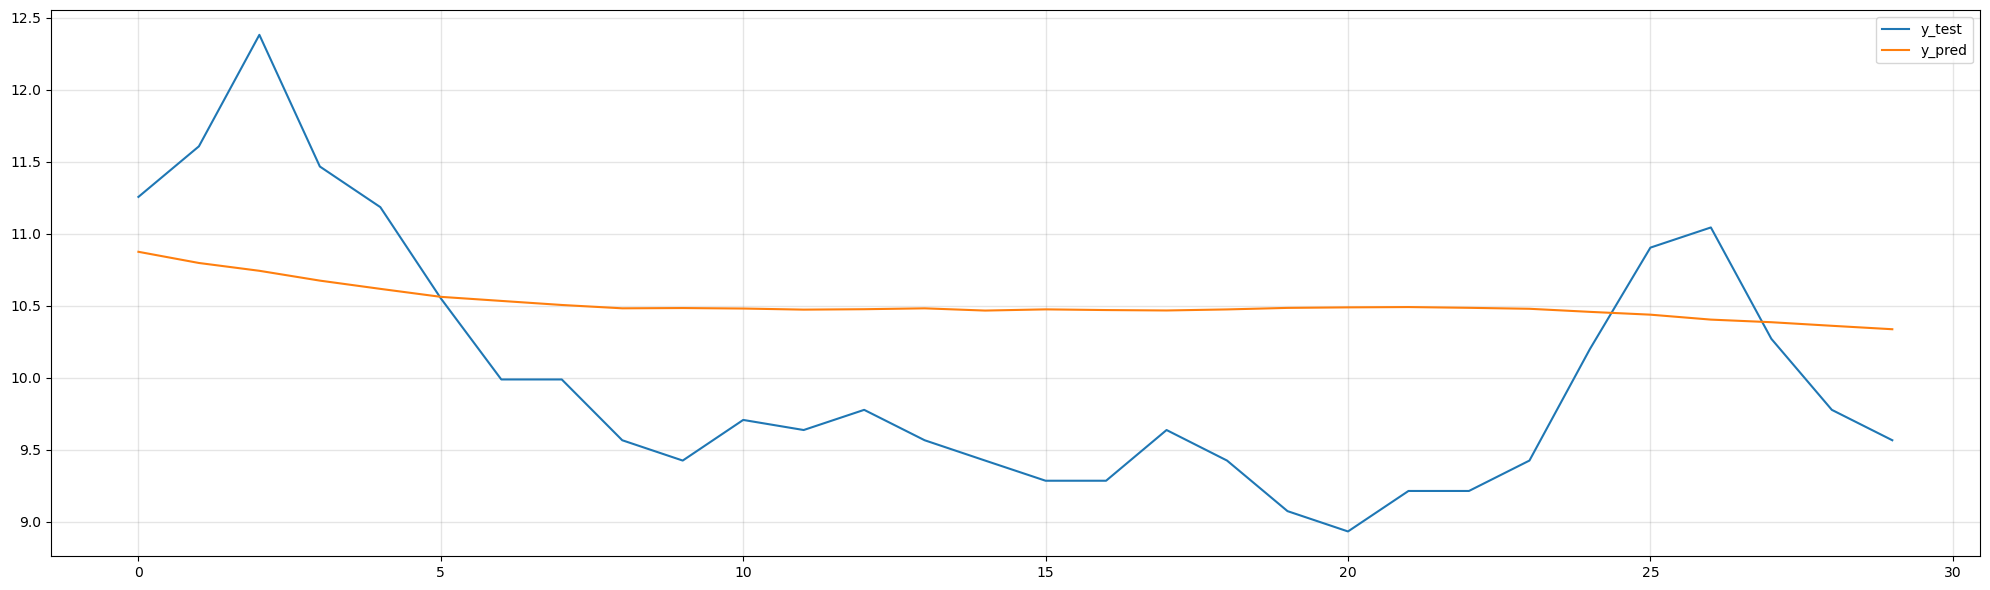

In [9]:
model = StackingRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_i'/nverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

Using cpu backend
Epoch 1/3000  
55/55 - p0 -  [*lr: 0.0009045] - loss: 0.0636 - mae: 0.1432 - val_loss: 0.0443 - val_mae: 0.0443 - 0.25s/epoch - 0.005s/step
Epoch 2/3000  
55/55 - p1 -  [*lr: 0.0006545] - loss: 0.0479 - mae: 0.1394 - val_loss: 0.0627 - val_mae: 0.0627 - 0.20s/epoch - 0.004s/step
Epoch 3/3000  
55/55 - p2 -  [*lr: 0.0003455] - loss: 0.0641 - mae: 0.1385 - val_loss: 0.0711 - val_mae: 0.0711 - 0.19s/epoch - 0.004s/step
Epoch 4/3000  
55/55 - p3 -  [*lr: 9.55e-05] - loss: 0.1864 - mae: 0.1514 - val_loss: 0.1990 - val_mae: 0.1990 - 0.19s/epoch - 0.003s/step
Epoch 5/3000  
55/55 - p4 - [*lr: 0.000000e+00] - loss: 0.2098 - mae: 0.1307 - val_loss: 0.2294 - val_mae: 0.2294 - 0.19s/epoch - 0.003s/step
Epoch 6/3000  
55/55 - p5 -  [*lr: 9.55e-05] - loss: 0.2076 - mae: 0.1193 - val_loss: 0.2294 - val_mae: 0.2294 - 0.21s/epoch - 0.004s/step
Epoch 7/3000  
55/55 - p6 -  [*lr: 0.0003455] - loss: 0.2133 - mae: 0.1238 - val_loss: 0.2325 - val_mae: 0.2325 - 0.20s/epoch - 0.004s/step
Ep

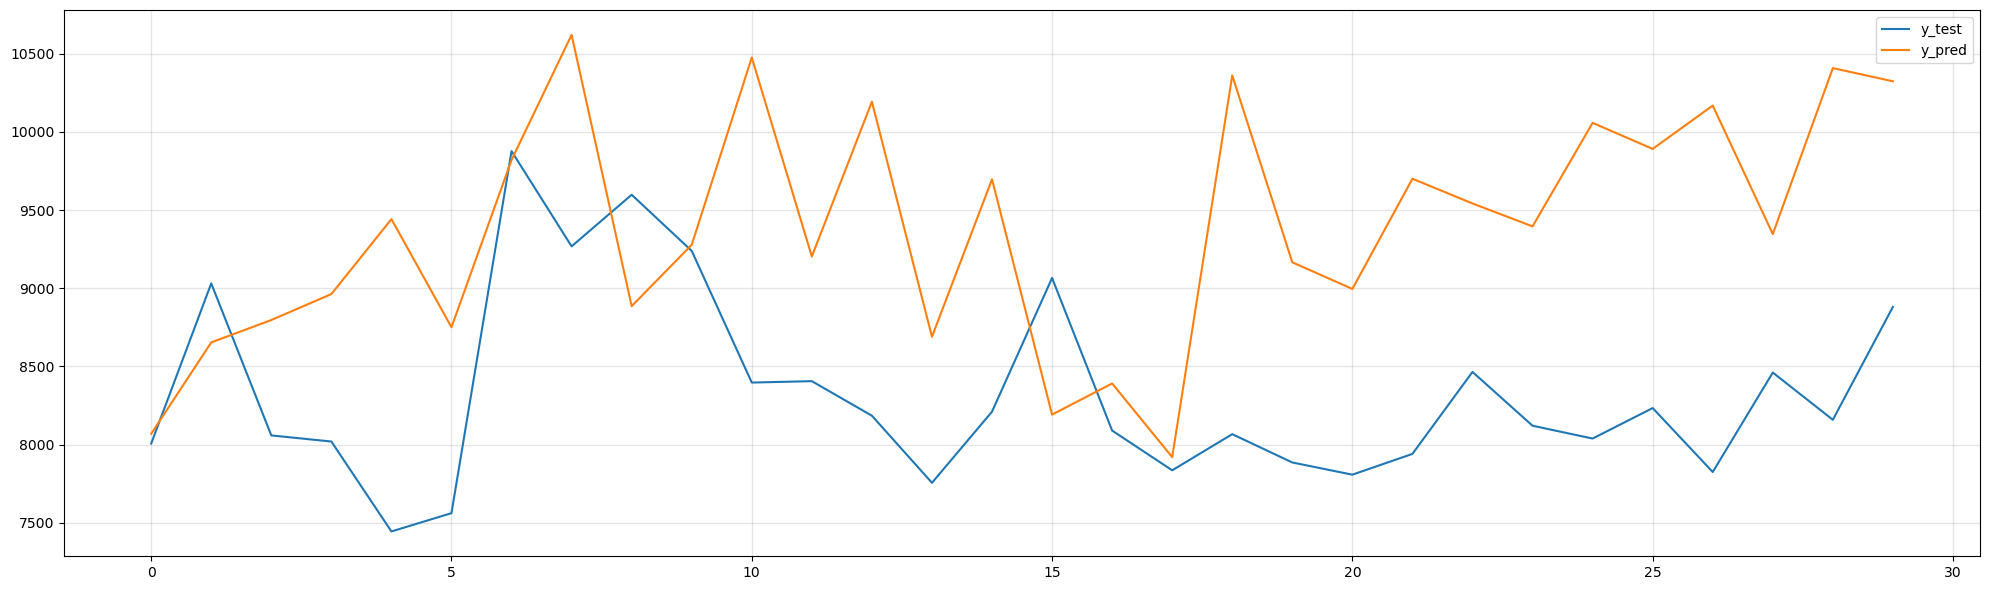

In [9]:
model = StackingRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# GAUNet

MPS  available: True  | MPS  use: False
CUDA available: False | CUDA use: False
CPU  available: True  | CPU  use: True


Epoch 1/3000  
55/55 - p0 -  [*lr: 0.0009045] - loss: 0.2215 - mae: 0.2215 - val_loss: 0.1545 - val_mae: 0.1545 - 0.36s/epoch - 0.007s/step
Epoch 2/3000  
55/55 - p0 -  [*lr: 0.0006545] - loss: 0.1363 - mae: 0.1363 - val_loss: 0.1291 - val_mae: 0.1291 - 0.30s/epoch - 0.005s/step
Epoch 3/3000  
55/55 - p0 -  [*lr: 0.0003455] - loss: 0.1340 - mae: 0.1340 - val_loss: 0.0843 - val_mae: 0.0843 - 0.31s/epoch - 0.006s/step
Epoch 4/3000  
55/55 - p0 -  [*lr: 9.55e-05] - loss: 0.1398 - mae: 0.1398 - val_loss: 0.0548 - val_mae: 0.0548 - 0.31s/epoch - 0.006s/step
Epoch 5/3000  
55/55 - p1 - [*lr: 0.000000e+00] - loss: 0.1723 - mae: 0.1723 - val_loss: 0.1613 - val_mae: 0.1613 - 0.30s/epoch - 0.006s/step
Epoch 6/3000  
55/55 - p2 -  [*lr: 9.55e-05] - loss: 0.1377 - mae: 0.1377 - val_loss: 0.1613 - val_mae: 0.1613 - 0.30s/epoch - 0.006s/step
Epoch 7/3000  
55/55 - p3 -  [*lr: 0.0003455] - loss: 0.1282 - mae: 0.1282 - val_loss: 0.1415 - val_mae: 0.1415 - 0.30s/epoch - 0.005s/step
Epoch 8/3000  
55/55

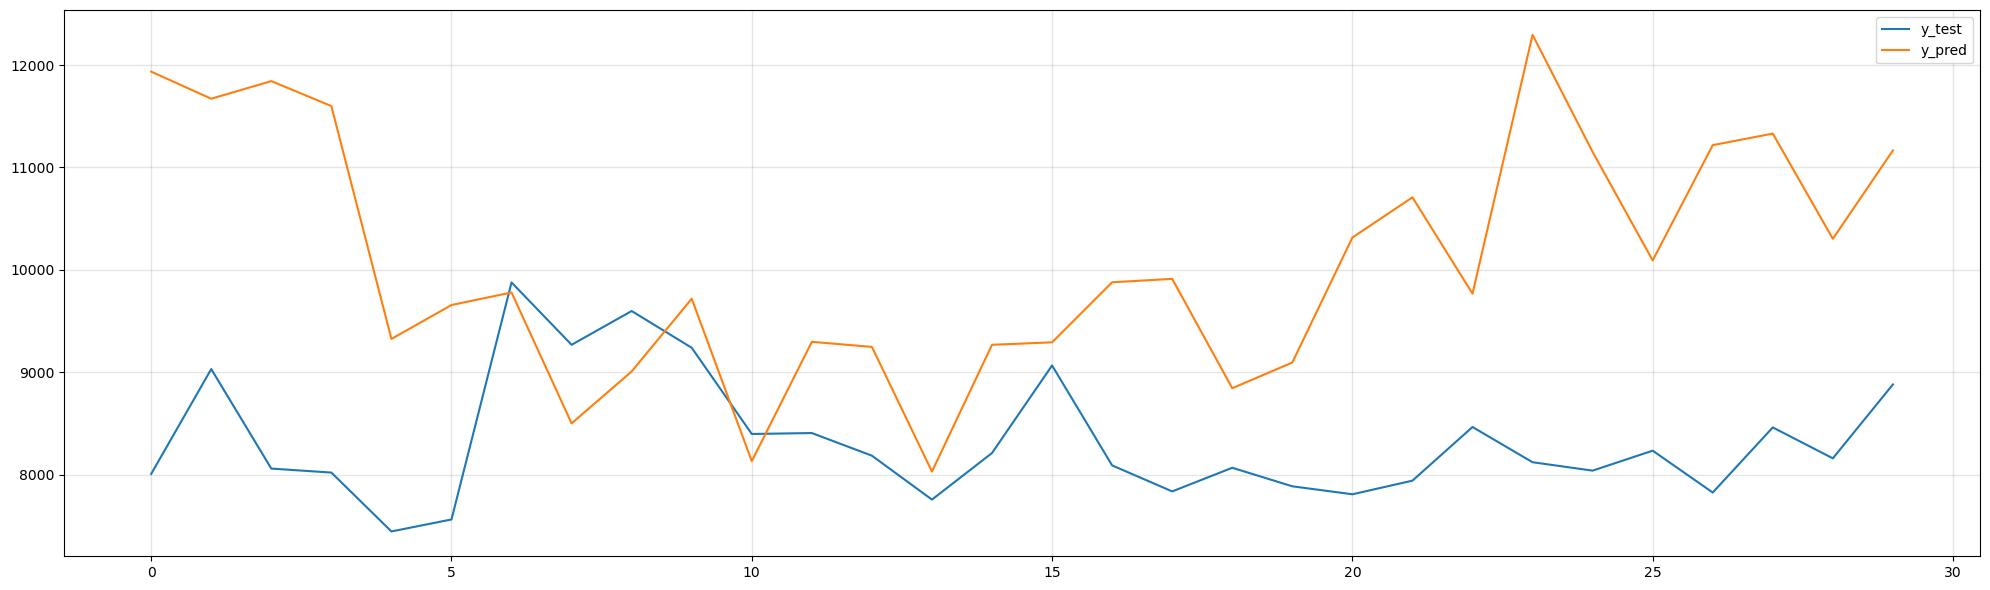

In [9]:
model = GAUNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, level=2, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

r2: -4.200404730778906
mae: 2390.407404256605
mape: 0.2089176787529306


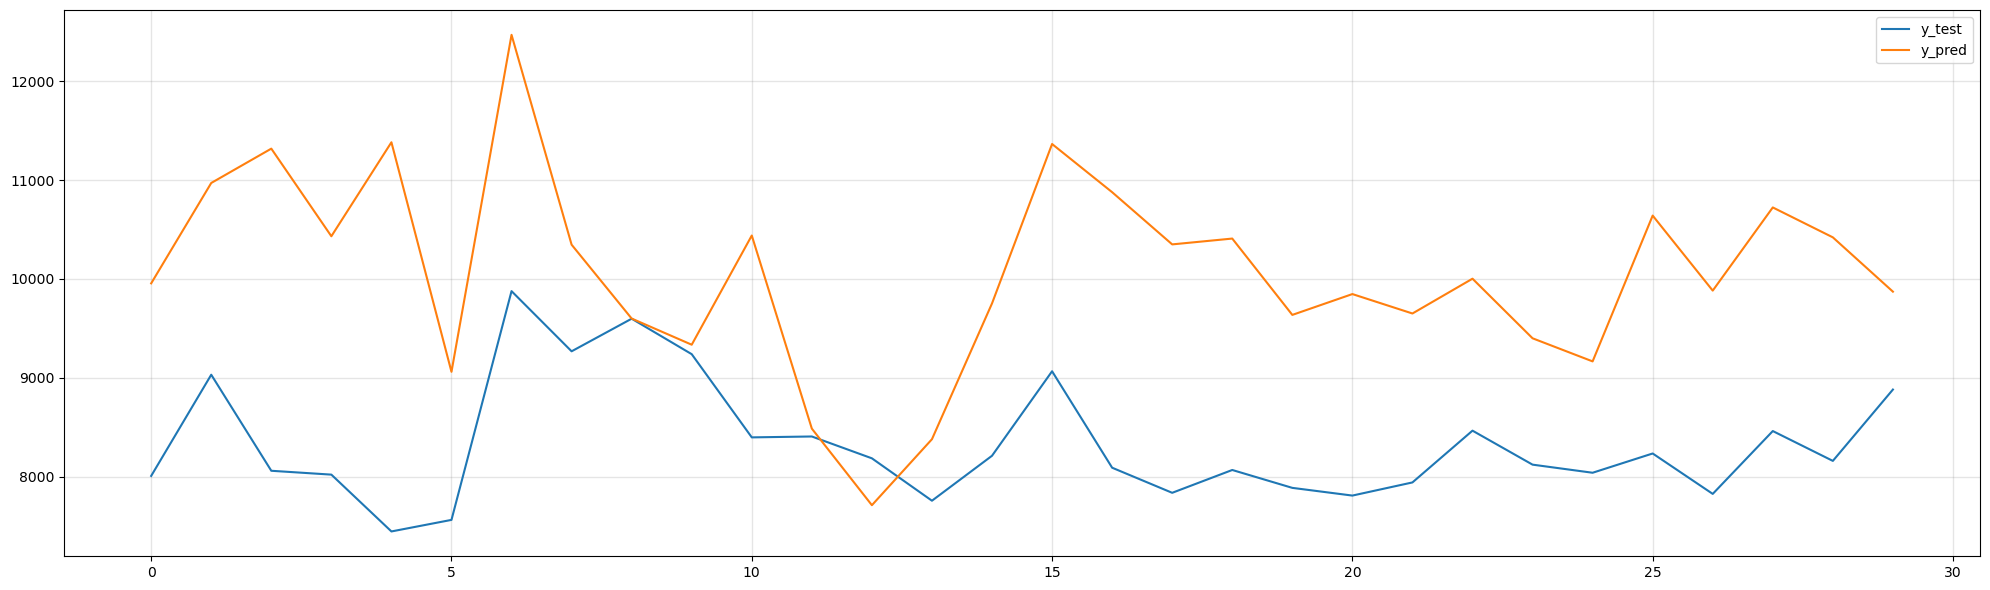

In [10]:
model = GAUNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, level=2, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# Time2VecNet

Using cpu backend
Epoch 1/3000  
55/55 - p0 - loss: 0.1514 - mae: 0.2248 - val_loss: 0.1359 - val_mae: 0.1359 - 0.23s/epoch - 0.004s/step
Epoch 2/3000  
55/55 - p0 - loss: 0.1378 - mae: 0.1688 - val_loss: 0.1120 - val_mae: 0.1120 - 0.21s/epoch - 0.004s/step
Epoch 3/3000  
55/55 - p0 - loss: 0.0935 - mae: 0.1577 - val_loss: 0.0989 - val_mae: 0.0989 - 0.21s/epoch - 0.004s/step
Epoch 4/3000  
55/55 - p0 - loss: 0.0857 - mae: 0.1408 - val_loss: 0.0913 - val_mae: 0.0913 - 0.21s/epoch - 0.004s/step
Epoch 5/3000  
55/55 - p0 - loss: 0.0736 - mae: 0.1331 - val_loss: 0.0835 - val_mae: 0.0835 - 0.21s/epoch - 0.004s/step
Epoch 6/3000  
55/55 - p0 - loss: 0.0774 - mae: 0.1247 - val_loss: 0.0788 - val_mae: 0.0788 - 0.21s/epoch - 0.004s/step
Epoch 7/3000  
55/55 - p0 - loss: 0.0695 - mae: 0.1195 - val_loss: 0.0743 - val_mae: 0.0743 - 0.20s/epoch - 0.004s/step
Epoch 8/3000  
55/55 - p0 - loss: 0.0627 - mae: 0.1056 - val_loss: 0.0734 - val_mae: 0.0734 - 0.20s/epoch - 0.004s/step
Epoch 9/3000  
55/55 -

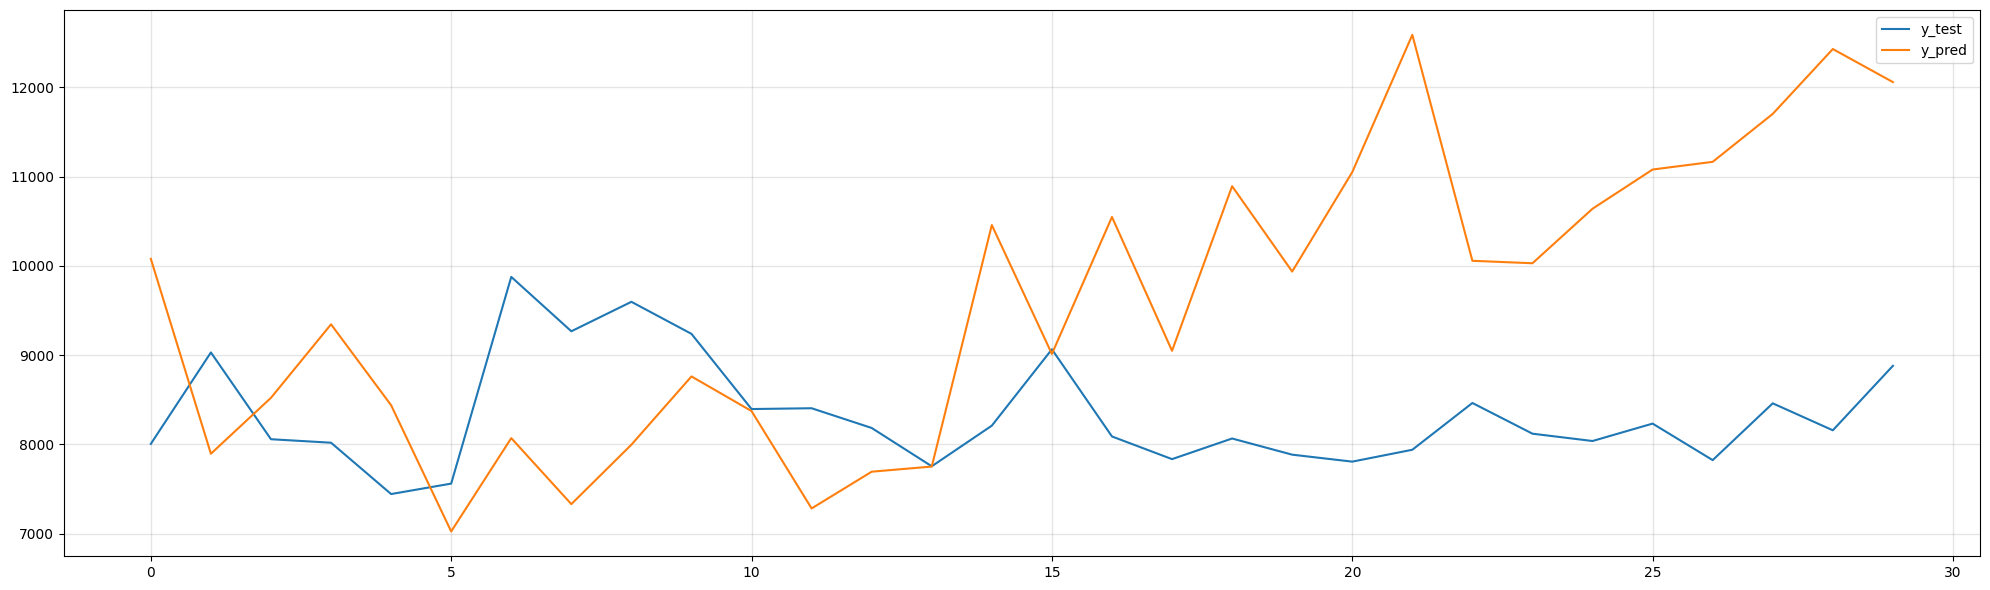

In [12]:
model = Time2VecNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler='ReduceLROnPlateau')

y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))